In [1]:
import mglearn

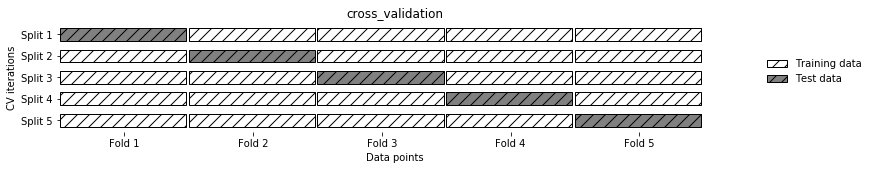

In [2]:
mglearn.plots.plot_cross_validation()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

In [7]:
iris =load_iris()
model = KNeighborsClassifier()

In [12]:
# cross_val_score ()
score = cross_val_score(model, iris.data, iris.target, cv=5)
print("교차 검증 검수: {}".format(score))

교차 검증 검수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [13]:
# 교차 검증의 장점 
# 데이터를 무작위로 운 좋게 좋은 결과가 나올 수 있고
# 데이터를 무작위로 했을 때, 운 좋게 나쁜 결과가 나올 수 있다. 

# 장점 1: 일반화된 모델을 생성할 수 있다.
# 장점 2: 분할을 한번 했을 때보다 데이터를 더 효과적으로 사용 가능하다. 



In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

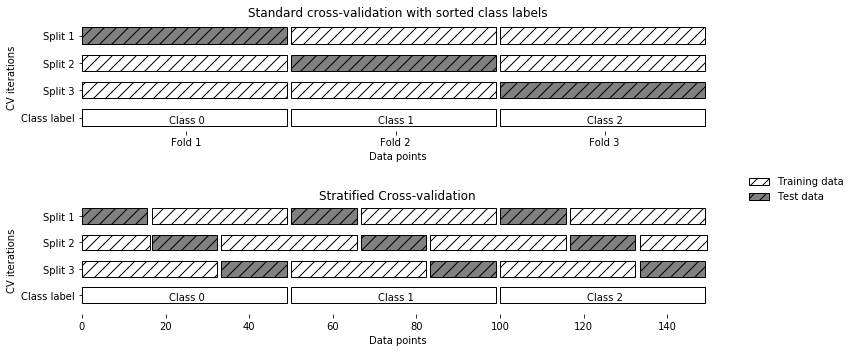

In [18]:
mglearn.plots.plot_stratified_cross_validation()

In [19]:
from sklearn.model_selection import KFold 

In [22]:
# 폴더 안의 클래스 비율 


kfold = KFold(n_splits = 3, shuffle= True, random_state=0)
result = cross_val_score(model, iris.data, iris.target, cv=kfold)
result

array([0.98, 0.96, 0.96])

In [23]:
import numpy as np
import matplotlib.pyplot as plt 

In [26]:
line = np.linspace(-3,3,100)
tanh_line = np.tanh(line)
relu_line = np.maximum(line,0) # 두 개의 배열값 중 최대값 찾기 
sig_line = 1/(1-np.exp(-line))

step_line = line.copy()
step_line[step_line <= 0] = 0
step_line[step_line > 0] = 1

In [27]:
# 음수표시 
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False



In [29]:
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = (14,10)

Text(0, 0.5, 'relu(x), tanh(x)')

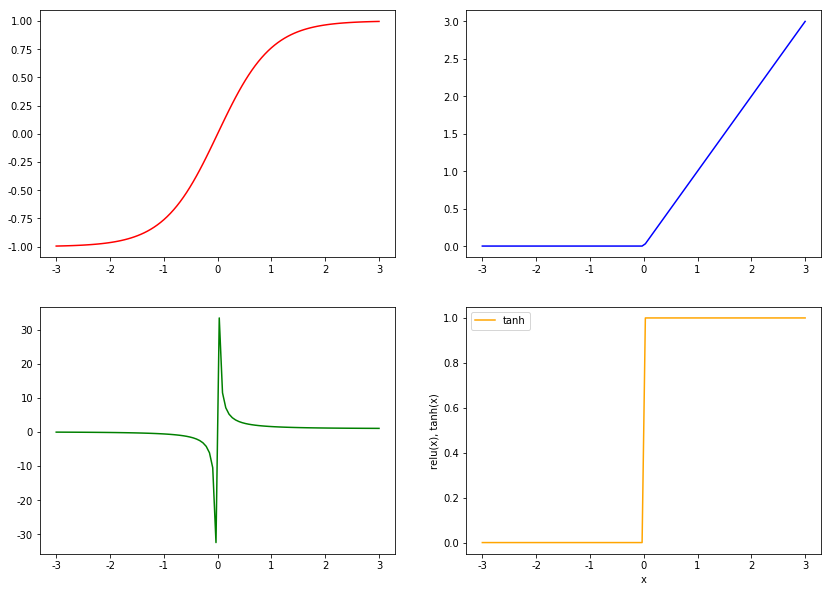

In [37]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(line, tanh_line, label='tanh',color='red',)

ax2.plot(line, relu_line, label='tanh',color='blue')
ax3.plot(line, sig_line, label='tanh',color='green')
ax4.plot(line, step_line, label='tanh',color='orange')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')


In [38]:
# (1) 그래프를 하나의 그래프위에 그려주시고,
# (2) 범례의 위치를 왼쪽 상단에 넣어주세요 
# plt.plot(line, tanh_line ) 

In [40]:
## 이항 분류 : 시그모이드 (한개의 노드로 구현가능) 
## 다항 분류 : 소프트맥스 ()


In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split 

In [44]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                   stratify=y, random_state=42)

In [48]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

ValueError: RGBA values should be within 0-1 range

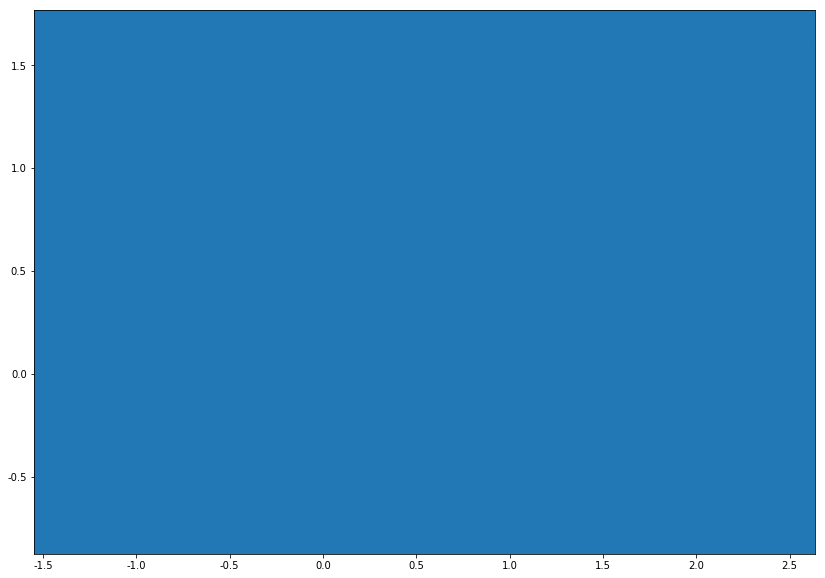

In [49]:
## 은닉 유닛이 100개인 신경망으로 학습. 
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

활성화 함수를

Standard Scaler

1) 각 특성의 평균을 0, 분산을 1로 변경한다. 
2) feature(특성)의 최소값과 최대값의 크기를 제한하지 않는다. 

MinMaxScaler

1) 모든 특성이 정확하게 0과1사이에 위치하도록 데이터를 변경한다. 

RobustScaler

StandardScaler와 비슷하다. 
평균과 분산 대신에 중간값과 사분위 값을 사용한다. 
 
중앙값을 선택하기 때문에 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않는다. 

Normalizer

유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다.
지름이 1인 원에 데이터 포인트를 투영한다. 

데이터 변경 연습해 보기 -MinMaxScaler


In [59]:

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()

### 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                   cancer.target, 
                                                   stratify = cancer.target, 
                                                   random_state=77)

print(X_train.shape)
print(X_test.shape)



(426, 30)
(143, 30)


In [ ]:
robust 

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_scaled = robust_scaler.transform(X_train)

X_train_scaled.shape

(426, 30)

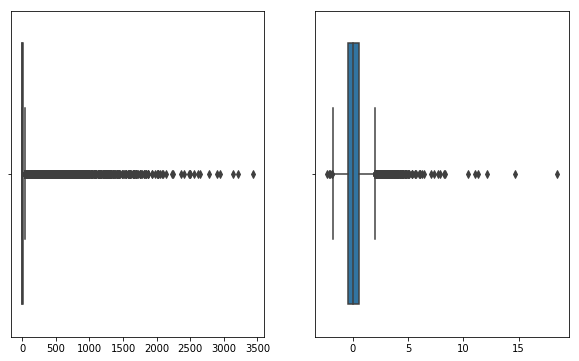

In [61]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)



## Standard 

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit(X_train).transform(X_train)

#fit 한 다음에 transform 하기 ~! 
print("변경전의 값", X_train[0:2])
print("변경후의 값", X_train_scaler[0:2])

변경전의 값 [[1.510e+01 1.639e+01 9.958e+01 6.745e+02 1.150e-01 1.807e-01 1.138e-01
  8.534e-02 2.001e-01 6.467e-02 4.309e-01 1.068e+00 2.796e+00 3.984e+01
  9.006e-03 4.185e-02 3.204e-02 2.258e-02 2.353e-02 4.984e-03 1.611e+01
  1.833e+01 1.059e+02 7.626e+02 1.386e-01 2.883e-01 1.960e-01 1.423e-01
  2.590e-01 7.779e-02]
 [9.504e+00 1.244e+01 6.034e+01 2.739e+02 1.024e-01 6.492e-02 2.956e-02
  2.076e-02 1.815e-01 6.905e-02 2.773e-01 9.768e-01 1.909e+00 1.570e+01
  9.606e-03 1.432e-02 1.985e-02 1.421e-02 2.027e-02 2.968e-03 1.023e+01
  1.566e+01 6.513e+01 3.149e+02 1.324e-01 1.148e-01 8.867e-02 6.227e-02
  2.450e-01 7.773e-02]]
변경후의 값 [[ 0.29253315 -0.67645273  0.32880201  0.07093271  1.32169444  1.44033855
   0.32026234  0.94724841  0.6726624   0.26959969  0.07088396 -0.31542564
  -0.05676001 -0.0139241   0.60491533  0.91936383  0.00423717  1.70763711
   0.32960539  0.40795786 -0.02193319 -1.20012015 -0.03044643 -0.19998512
   0.30204999  0.25059293 -0.34186522  0.4445237  -0.47764605 -0.32

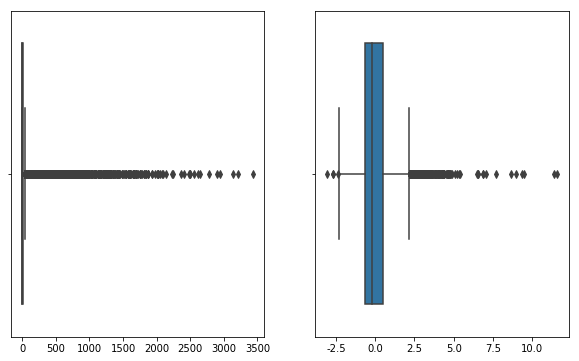

In [69]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaler)



## K-means => 비지도학습
* DBScan, (거리, 갯수)
* core point
* border point
* noise point 

## KNN => 지도학습 




In [70]:
import mglearn
%matplotlib inline

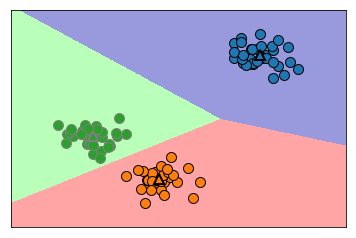

In [71]:
mglearn.plots.plot_kmeans_boundaries()

In [73]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

In [76]:
X, y = make_moons(n_samples=200,noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

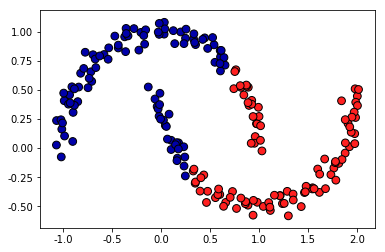

In [77]:
import matplotlib.pyplot as plt

# 클러스터 할당과 클러스터 중심을 표시
col1 = X[: ,0]
col2 = X[: ,1]
plt.scatter(col1, col2, c=y_pred,
           cmap=mglearn.cm2,
           s=60, edgecolors='k')

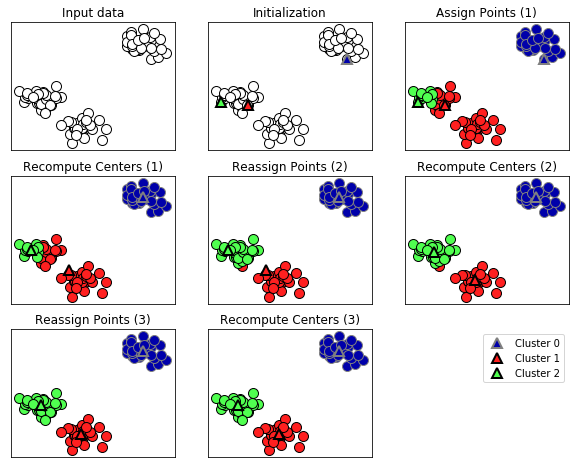

In [78]:
mglearn.plots.plot_kmeans_algorithm()

In [79]:
## 클러스터의 중심 표시하기 

kmeans.cluster_centers_



array([[-0.2003285 ,  0.58035606],
       [ 1.20736718, -0.0825517 ]])

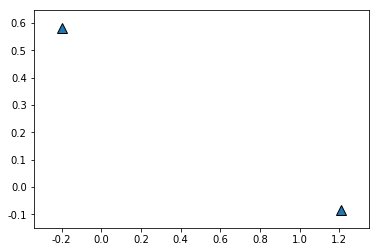

In [81]:
groupA = kmeans.cluster_centers_[:,0]
groupB = kmeans.cluster_centers_[:,1]

mglearn.discrete_scatter(groupA, groupB, markers="^")


In [90]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
clusters

## X: make_moons 첫번째 열
## Y: make_moons 두번쨰 열 
## c(컬러):clusters
## 레이블은 X : 특성 0, Y: 특성1 

X = X_scaled[:,0]
Y = Y_scaled[:,1]
plt.scatter(X,Y, c = clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.36748451  1.28731953 -0.59397643 -1.74182239  1.45705144  1.58953574
  0.54875768  0.44914675  0.46138047  0.71117525 -0.98693652 -0.28618307
  1.51445888  0.82589866 -1.51451022  0.55545785  0.05104108 -0.17030547
 -0.1659644  -1.46106881  1.63987535  0.41814803 -0.34023715  0.90980627
 -0.88905065 -0.29208555  1.55266276  1.59187607 -0.37934026 -0.41055433
  0.45245353 -0.83121845  0.55790861 -0.52095895  0.30716417  1.6228749
 -0.06928845  0.53390556 -1.53710739 -0.61686946  0.06722244 -1.07301083
  0.1798663  -0.45169996  1.20711239 -0.99770134  0.59723286 -1.39470231
 -0.3844618   0.42201788 -1.36939277 -0.19338678  1.70246706 -1.6075826
  0.62945176  0.2947686   0.06103803  0.85342102 -0.28369989 -0.8076948
 -0.16648172 -1.73548641  1.47405817  0.43337289  0.69234549 -1.79736765
 -0.75163854  1.11190423 -0.53486952 -1.64406031  0.18803279 -1.70698904
 -0.03795297 -0.72101613  0.36618187 -1.65738552 -0.50877018  0.49331323
  0.12667562  0.26745617  1.70147501 -0.59313837  0.16256503  1.73220826
 -0.54301103 -0.98124445  0.5250457  -0.95873193  0.11819183  1.71362853
 -0.18954869  0.5714598   1.71163022 -1.34365115  1.73349232  1.47590836
  1.42219895 -0.10327175 -1.7455429  -0.49598905  0.92287472  1.69534093
 -0.53253859  0.61305514 -1.60279532 -0.4770109  -1.70312332 -1.11329651
  1.20463085 -0.30189965 -1.24049229 -0.52656853 -0.59186855 -1.54843032
  0.49316295  1.07383133  0.12590421  1.66064862  0.09563647  0.28301401
  0.42984932 -1.38463036 -0.60492802 -0.60382074 -0.64200381 -1.47844436
  0.4870012  -0.36543386  0.97843121  1.70637232  0.57885331 -1.19199393
 -1.7132458  -0.30102709  0.82358091  1.26715249  0.75941869 -1.72738436
  1.74628216  0.44961808 -0.45289238 -0.58382363 -0.0582972  -0.97905972
 -1.07257691  0.59525046 -0.30449677  0.98031202 -0.27791153 -0.57630346
 -0.0243162   1.35858663  0.40056749 -0.17700919  0.10432044 -0.77399147
  0.8743859  -0.18476378  0.03421815  0.167408   -0.38865468  0.70589673
  0.12301489  1.13115319 -0.11305523  1.34905508 -0.02405492  0.24042439
  1.22490245  0.50896391  0.1348244  -1.79871005 -1.61709553 -1.42798084
 -0.40106824  0.51296957  1.5469388  -1.33623582 -1.41421082  0.12044026
  1.12186738 -1.58785286  1.64333253  1.4802115   1.66900816 -0.18558001
 -0.76328162  0.31452227 -1.58717024 -1.29102533 -1.63657297 -0.08260286
  0.35808699  0.50882709 -0.58803642 -1.18487133  1.59044067 -0.36794876
 -0.42704874  1.29068005].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0, 0.5, 'feature 1')

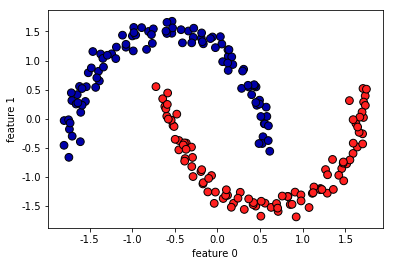

In [92]:

X = X_scaled[:,0]
Y = X_scaled[:,1]
plt.scatter(X,Y, c = clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#PCA 비지도변환 

벡터와 직교하는 변수를 찾아서, 설명력이 높고 독립인 변수들을 찾아서 
모델을 만든다. 


주성분 분석은 통계적으로 상관관계가 없도록 변수들을 회전시키는 방법이다. 
PCA1 은 기존 변수들의 선형결합이다. 

###
* PCA 알고리즘은 제일 먼저 '성분1'이라고 하는 것을 찾는다. 분산이 가장 큰 방향. 
 * 데이터에서 가장 많은 정보를 담고 있는 방향이 된다.

* 첫번째 방향과 직각인 방향 중에서 가장 많은 정보를 담는 방향을 찾는다. 

* 이런 과정을 거쳐 찾은 방향의 데이터는 주된 분산의 방향이라고 해서 주성분이라 한다. 

* 일반적으로 원본 특성 feature 의 개수만큼 주성분이 있다. 

* 주성분1, 주성분2는 각각 독립적이다. 




In [96]:
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

In [97]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [100]:
model = PCA()
X_pca_dat = model.fit(X_iris).transform(X_iris)
print(x_pca_dat.shape, type(x_pca_dat))

(150, 4) <class 'numpy.ndarray'>


In [103]:
X_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
x_pca_dat[0:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [109]:
model = PCA(n_components=2)
X_pca2 = model.fit_transform(X_iris)
import pandas as pd
df = pd.DataFrame(X_pca2[0:,0:])
df.head()

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


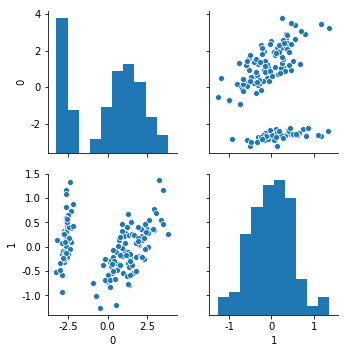

In [110]:
sns.pairplot(df)

In [111]:
iris['PCA1'] = df.iloc[: , 0] # 주성분 1
iris['PCA2'] = df.iloc[: , 1] # 주성분 2 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [121]:
## lmplot 를 이용해서 PCA1, PCA2
## hue = species
## 



In [124]:
sns.lmplot(iris['PCA1'],iris['PCA2'],iris,hue = iris['species'])

TypeError: '<' not supported between instances of 'str' and 'float'

In [117]:
import os
import mglearn
import pandas as pd
path = mglearn.datasets.DATA_PATH

In [118]:
os.path.join(path, 'adult.data')

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\mglearn\\data\\adult.data'

In [120]:
print(os.getcwd) 

<built-in function getcwd>


In [133]:
## 01 path 를 지정한다. (adult.data)
## 02 pandas 를 이용해서 불러온다. (header=None, index_col=False, names='컬럼지정')

names = {}

path = os.path.join(mglearn.datasets.DATA_PATH, 'adult.data')
data = pd.read_csv(path, header=None, index_col=False,
                   names = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum","MaritalStatus", "Occupation", "Relationship", "Race", "Gender","CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"])


In [152]:
### 일부 특성(feature) 를 선택해 보겠다. 
#data.columns
data_dummies.columns

Index(['Age', 'fnlwgt', 'EducationNum', 'CapitalGain', 'CapitalLoss',
       'HoursPerWeek', 'WorkClass_ ?', 'WorkClass_ Federal-gov',
       'WorkClass_ Local-gov', 'WorkClass_ Never-worked',
       ...
       'NativeCountry_ Scotland', 'NativeCountry_ South',
       'NativeCountry_ Taiwan', 'NativeCountry_ Thailand',
       'NativeCountry_ Trinadad&Tobago', 'NativeCountry_ United-States',
       'NativeCountry_ Vietnam', 'NativeCountry_ Yugoslavia', 'Income_ <=50K',
       'Income_ >50K'],
      dtype='object', length=110)

In [170]:
data_dummies = pd.get_dummies(data)
data_dummies['Occupation_ Transport-moving']



0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       1
24       0
25       0
26       0
27       0
28       0
29       0
        ..
32531    0
32532    0
32533    0
32534    0
32535    0
32536    0
32537    0
32538    0
32539    0
32540    0
32541    0
32542    0
32543    0
32544    0
32545    0
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    0
32556    0
32557    0
32558    0
32559    0
32560    0
Name: Occupation_ Transport-moving, Length: 32561, dtype: uint8

### 입력변수 age ~ occupation_transport=moving 을 이용해서
income > 50K 인지 아닌지를 예측하는 모델을 만들겠다. 

In [177]:
features = data_dummies.loc[ : , 'Age':'Occupation_ Transport-moving']
X = features.values
y = data_dummies.loc[:,'Income_ <=50K':'Income_ >50K'].values 

print(type(X), type(y))
print(X.shape, y.shape)




<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(32561, 53) (32561, 2)


## 로지스틱 모델을 만들어 볼텐데.. 
1) 데이터를 나누어준다.
2) 모델을 만든다
3) 모델을 학습한다. 학습데이터를 이용 4) score 를 확인(테스트 데이터를 이용해서)

In [176]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   stratify = y, 
                                                   random_state=0)

print(X_train.shape)
print(X_test.shape)


(24420, 53)
(8141, 53)


In [175]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

-301.1118976475533
-302.20026591607103


In [181]:
dat = {'물품':['양말','여우','양말','상자']}

demo_df = pd.DataFrame(dat) 

In [182]:
print(demo_df)

   물품
0  양말
1  여우
2  양말
3  상자


In [185]:
onehot = pd.get_dummies(demo_df)
onehot

,물품_상자,물품_양말,물품_여우
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0


In [188]:



all_dat = pd.concat( [demo_df, onehot], axis=1)
all_dat

,물품,물품_상자,물품_양말,물품_여우
0,양말,0,1,0
1,여우,0,0,1
2,양말,0,1,0
3,상자,1,0,0
